# This notebook will go through integrating/concatenating datasets and basic annotations including cell typing.

<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/notebooks2025/Lecture6_SpatialTranscriptomics_ImageManip.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of Packages

In [1]:
!pip install matplotlib==3.7.5
#==3.6.2

In [2]:
!pip install scanpy==1.10.1
!pip install pandas==2.2.2
!pip install numpy==1.26.4

In [3]:
!pip install anndata

In [4]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00


## Import packages

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import anndata as ad

/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/usr

# Reading in and initial data processing

In [6]:
#Downloads the data from online
dat = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")

  0%|          | 0.00/7.86M [00:00<?, ?B/s]

  0%|          | 0.00/29.3M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
dat.var_names_make_unique() #makes variables unique in the data
dat.var["mt"] = dat.var_names.str.startswith("MT-") #identifies the mitochondrial genes
sc.pp.calculate_qc_metrics(dat, qc_vars=["mt"], inplace=True) #calculates the classic qc metrics

In [8]:
dat

AnnData object with n_obs × n_vars = 4035 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
sc.pp.filter_cells(dat, min_counts=5000) #filters minimum and maximum gene count info
sc.pp.filter_cells(dat, max_counts=35000)
dat = dat[dat.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {dat.n_obs}")
sc.pp.filter_genes(dat, min_cells=10)

#cells after MT filter: 3861


In [10]:
sc.pp.normalize_total(dat, inplace=True) #normalize
sc.pp.log1p(dat) #log transform
sc.pp.highly_variable_genes(dat, flavor="seurat", n_top_genes=2000)

In [11]:
sc.pp.pca(dat)
sc.pp.neighbors(dat)
sc.tl.umap(dat)
sc.tl.leiden(dat, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

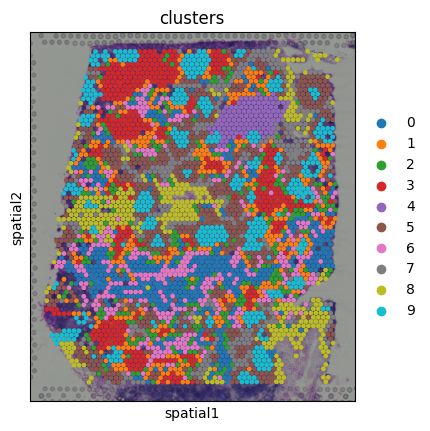

In [12]:
sc.pl.spatial(dat, img_key="hires", color="clusters", size=1.5)

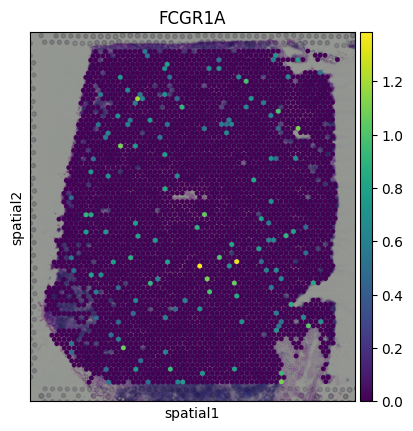

In [20]:
sc.pl.spatial(dat, img_key="hires", color="FCGR1A", size=1.5)

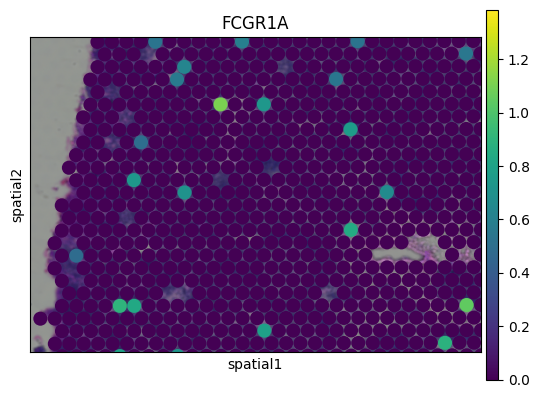

In [21]:
sc.pl.spatial(dat, img_key="hires", color="FCGR1A", crop_coord = [1700, 6000, 3000, 6000], size=1.5)

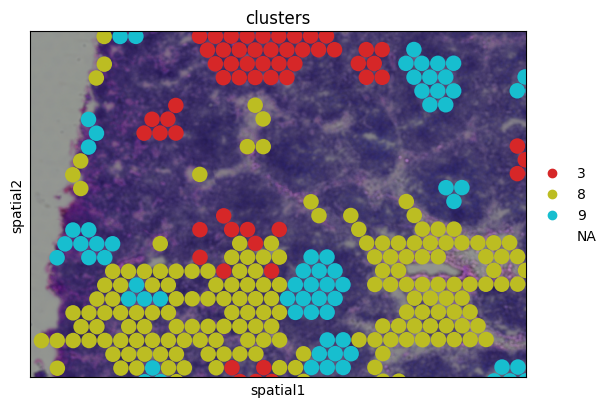

In [24]:
sc.pl.spatial(dat, img_key="hires", color="clusters", groups = ["3","8","9"], crop_coord = [1700, 6000, 3000, 6000], size=1.5)

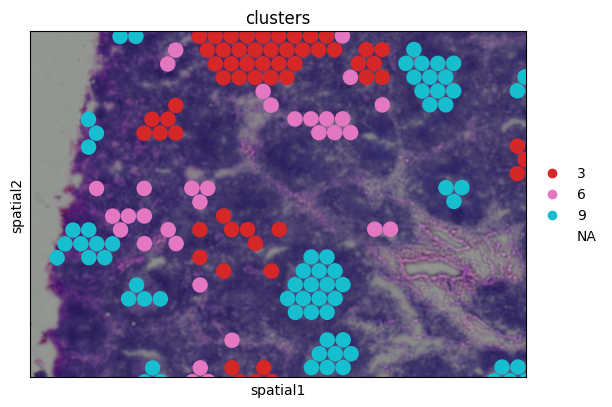

In [25]:
sc.pl.spatial(dat, img_key="hires", color="clusters", groups = ["3","6","9"], crop_coord = [1700, 6000, 3000, 6000], size=1.5)

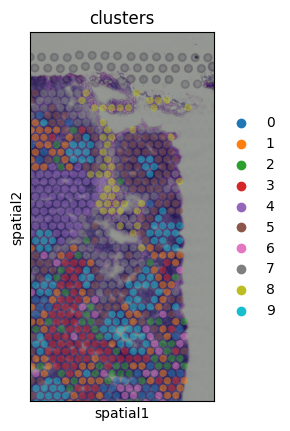

In [ ]:
sc.pl.spatial(dat, img_key = 'hires', color = 'clusters', crop_coord = [7000, 10000, 0, 6000], alpha = 0.5, size = 1.3)

#Importing Images into Python

In [26]:
!curl -O -J -L https://www.dropbox.com/scl/fi/ch89ctvzmlkxp1lpwi63k/Homework6.png?rlkey=rud80ipa4mmfj2ssmvvkplh6i&dl=0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01    17
100 10.0M  100 10.0M    0     0  5829k      0  0:00:01  0:00:01 --:--:-- 5829k


In [27]:
!pip install opencv-python

In [28]:
from google.colab.patches import cv2_imshow
import cv2    #for non-Colab

In [29]:
#read in image file
img = cv2.imread('Homework6.png')

In [30]:
#Shrink image size - keep this the same for colab, original image very large scale
resized_image = cv2.resize(img, (500,500))

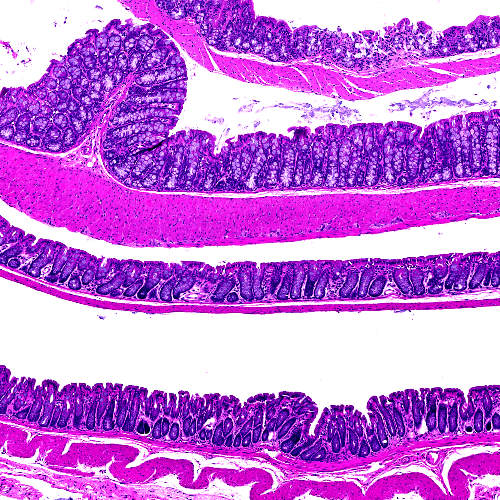

In [44]:
cv2_imshow(resized_image)
#cv2.imshow()    #for non-Colab - will crash Colab kernal

In [32]:
#Rotate the image
rot_image = cv2.rotate(resized_image, cv2.ROTATE_180)

In [45]:
#Rotate the image 90 degrees counterclockwise
rot_image = cv2.rotate(resized_image, cv2.ROTATE_90_COUNTERCLOCKWISE)


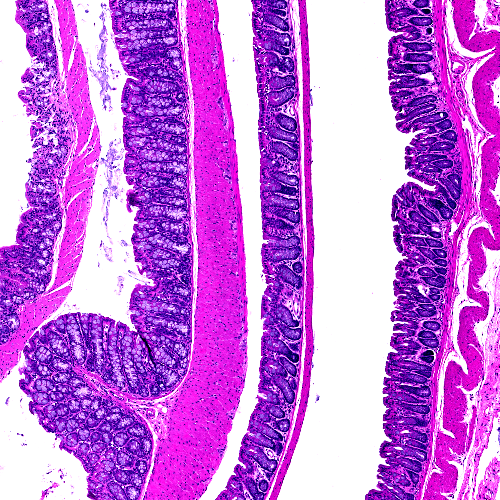

In [46]:
cv2_imshow(rot_image)

In [49]:
#convert the image to a different color - greyscale
Bluegreen_img = cv2.cvtColor(rot_image, cv2.COLOR_BGR2YCrCb)

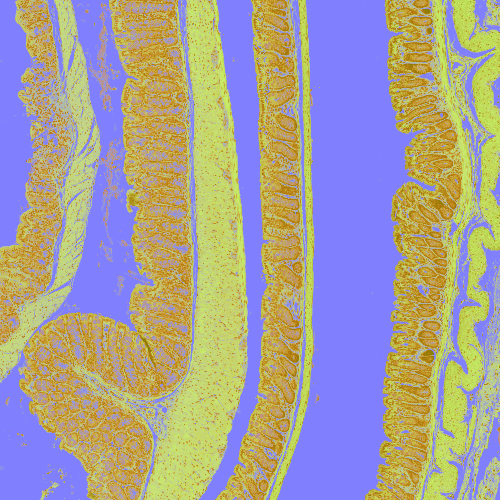

In [51]:
cv2_imshow(Bluegreen_img)